In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_5q0 = pd.read_csv('../data/data_5q0.csv')
df_hcepc = pd.read_csv('../data/HCEPC.csv')
# df_hr = pd.read_csv('../data/ihme_hrh.csv')
# df_pop = pd.read_csv('../data/pop_dens.csv')
# df_sdi = pd.read_csv('../data/sdi.csv')
# df_urban = pd.read_csv('../data/urban_share.csv')

df_ihme5q0 = pd.read_csv('../data/Ihme_5Q0_.csv')
df_ihmehpc = pd.read_csv('../data/IHME_HCEPC.csv')
df_list = pd.read_csv('../data/list_of_countries.csv')

# PART 1: 

## DATA FOR COMPARISON (IHME VS WHO)

## WHO DATA

### 1.1. 5q0

In [3]:
df_list['Country Name'] = df_list['Country Name'].str.title()

In [6]:
df_5q0 = df_5q0[['SpatialDimValueCode', 'Location','Point_5q0', 'Min_5q0', 'Max_5q0','Period','Dim1']]
df_5q0 = df_5q0[df_5q0['Dim1'] == 'Both sexes']
df_5q0 = df_5q0[(df_5q0['Period'] >= 2000) & (df_5q0['Period'] <= 2019)]
df_5q0.shape

(940, 7)

### 1.2. Healthcare expenditure

In [10]:
df_hcepc = df_hcepc[df_hcepc['Country Name'].isin(df_list["Country Name"] .unique())]
df_hcepc.drop(columns=['Indicator Name','Indicator Code'], inplace=True)
df_hcepc_ = df_hcepc.melt(id_vars=['Country Code','Country Name'])
df_hcepc_.rename(columns={'variable': 'year', 'value':'hcexp'}, inplace = True)
df_hcepc_.head()

,Country Code,Country Name,year,hcexp
0,AGO,Angola,2000,13.000087
1,BDI,Burundi,2000,8.523499
2,BEN,Benin,2000,15.606560
3,BFA,Burkina Faso,2000,7.369819
4,BWA,Botswana,2000,195.296020


## IHME DATA

### 1.3. IHME 5q0 data

In [11]:
df_ihme = df_ihme5q0
df_ihme = df_ihme[df_ihme['sex_name'] == 'both']
df_ihme = df_ihme[df_ihme['location_name'].isin(df_5q0["Location"].unique())]

# df_ihme = df_ihme[df_ihme['age_group_name'] == 'Under 5']
df_ihme = df_ihme[(df_ihme['year_id'] >= 2000) & (df_ihme['year_id'] <= 2019)]
df_ihme_ = df_ihme[[ 'location_name','val', 'upper', 'lower','year_id']]
df_ihme_.rename(columns={'location_name': 'Country Name','val': 'ihme_pe','lower': 'ihme_low','upper': 'ihme_high', 'year_id':'year'}, inplace = True)
df_ihme_.head()

C:\Users\nahomw\AppData\Local\Temp\ipykernel_12980\496947571.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ihme_.rename(columns={'location_name': 'Country Name','val': 'ihme_pe','lower': 'ihme_low','upper': 'ihme_high', 'year_id':'year'}, inplace = True)


,Country Name,ihme_pe,ihme_high,ihme_low,year
28750,Algeria,0.040594,0.044473,0.036974,2000
28751,Algeria,0.038910,0.042679,0.035358,2001
28752,Algeria,0.037403,0.040933,0.034054,2002
28753,Algeria,0.036173,0.039830,0.032803,2003
28754,Algeria,0.034851,0.038390,0.031542,2004


In [13]:
df_ihme['location_name'].unique().shape, df_5q0['Location'].unique().shape


((46,), (47,))

##### IHME has 46 African countries while WHO has 47 unique countries on thier U5M data

### 1.4. IHME HCEPC data

In [15]:
df_ihmehpc = df_ihmehpc[df_ihmehpc['location_name'].isin(df_list["Country Name"].unique())]  #df_list["Country Name"]
# df_ihme5q0 = df_ihme5q0[df_ihme5q0['sex_name'] == 'both']
# df_ihme = df_ihme[df_ihme['age_group_name'] == 'Under 5']
df_ihmehpc = df_ihmehpc[(df_ihmehpc['year'] >= 2000) & (df_ihmehpc['year'] <= 2019)]
df_ihmehpc_ = df_ihmehpc[[ 'location_name','the_per_cap_mean','the_per_cap_lower', 'the_per_cap_upper','year']]
df_ihmehpc_.rename(columns={'location_name': 'Country Name'}, inplace = True)
df_ihmehpc_.head()

C:\Users\nahomw\AppData\Local\Temp\ipykernel_12980\1330484883.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ihmehpc_.rename(columns={'location_name': 'Country Name'}, inplace = True)


,Country Name,the_per_cap_mean,the_per_cap_lower,the_per_cap_upper,year
355,Algeria,103,93,114,2000
356,Algeria,110,99,122,2001
357,Algeria,117,106,130,2002
358,Algeria,118,107,130,2003
359,Algeria,118,107,130,2004


## Merging  data sets (5Q0 and HCEPC) for comparison

In [17]:
df_5q0.rename(columns={'SpatialDimValueCode':'Country Code', 'Location':'Country Name','Period':'year'}, inplace=True)
df_5q0.head()

,Country Code,Country Name,Point_5q0,Min_5q0,Max_5q0,year,Dim1
6,DZA,Algeria,23.45,21.73,25.36,2019,Both sexes
9,DZA,Algeria,23.98,22.63,25.44,2018,Both sexes
12,DZA,Algeria,24.48,23.41,25.61,2017,Both sexes
15,DZA,Algeria,24.92,24.07,25.80,2016,Both sexes
18,DZA,Algeria,25.30,24.65,25.98,2015,Both sexes


In [21]:
df_5q0['year'] = pd.to_numeric(df_5q0['year'])
df_hcepc_['year'] = pd.to_numeric(df_hcepc_['year'])
df_ihme_['year'] = pd.to_numeric(df_ihme_['year'])
df_ihmehpc_['year'] = pd.to_numeric(df_ihmehpc_['year'])

C:\Users\nahomw\AppData\Local\Temp\ipykernel_12980\1881054882.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ihme_['year'] = pd.to_numeric(df_ihme_['year'])
C:\Users\nahomw\AppData\Local\Temp\ipykernel_12980\1881054882.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ihmehpc_['year'] = pd.to_numeric(df_ihmehpc_['year'])


In [22]:
df_comp = df_5q0
df_comp = pd.merge(df_comp, df_hcepc_, on = ['Country Name', 'year'], how = 'left')
df_comp = pd.merge(df_comp, df_ihme_, on = ['Country Name', 'year'], how = 'left')
df_comp = pd.merge(df_comp, df_ihmehpc_, on = ['Country Name', 'year'], how = 'left')
df_comp.drop(columns = ['Dim1','Country Code_y'], inplace = True)
df_comp.rename(columns = {'Country Code_x': 'Country Code'}, inplace = True)
df_comp.head()

,Country Code,Country Name,Point_5q0,Min_5q0,Max_5q0,year,hcexp,ihme_pe,ihme_high,ihme_low,the_per_cap_mean,the_per_cap_lower,the_per_cap_upper
0,DZA,Algeria,23.45,21.73,25.36,2019,250.560776,0.019486,0.022349,0.017025,246.0,228.0,266.0
1,DZA,Algeria,23.98,22.63,25.44,2018,257.849853,0.020581,0.023307,0.017998,246.0,230.0,263.0
2,DZA,Algeria,24.48,23.41,25.61,2017,259.648865,0.021773,0.024434,0.019238,249.0,234.0,265.0
3,DZA,Algeria,24.92,24.07,25.80,2016,262.132172,0.023191,0.025831,0.020589,260.0,245.0,276.0
4,DZA,Algeria,25.30,24.65,25.98,2015,292.916596,0.024230,0.026978,0.021812,270.0,254.0,287.0


In [23]:
df_comp.to_csv('../data/results_csv/merged_raw1.csv',index=False)

# PART 2: 

## Data for SFMA and Regression Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\nahomw\Anaconda3\envs\sfma\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df_5q0 = pd.read_csv('../data/data_5q0.csv')
df_hcepc = pd.read_csv('../data/HCEPC.csv')
df_hr = pd.read_csv('../data/ihme_hrh.csv')
df_pop = pd.read_csv('../data/pop_dens.csv')
df_sdi = pd.read_csv('../data/sdi.csv')
df_urban = pd.read_csv('../data/urban_share.csv')
df_govern = pd.read_csv('../data/govern.csv')
df_ihme5q0 = pd.read_csv('../data/Ihme_5Q0_.csv')
df_ihmehpc = pd.read_csv('../data/IHME_HCEPC.csv')
df_hcepc_child = pd.read_csv('../data/hcepc_child.csv')
df_list = pd.read_csv('../data/list_of_countries.csv')
df_list['Country Name'] = df_list['Country Name'].str.title()

### 1.3. SDI

In [3]:
df_sdi_ = df_sdi.melt(id_vars=['Location'])
df_sdi_ = df_sdi_[df_sdi_['Location'].isin(df_list["Country Name"].unique())]  #df_list["Country Name"]
df_sdi_.rename(columns={'variable': 'year', 'value':'sdi'}, inplace = True)
df_sdi_['sdi'] = df_sdi_['sdi'].str.replace('·', '.')
df_sdi_['year'] = pd.to_numeric(df_sdi_['year'])
df_sdi_= df_sdi_[(df_sdi_['year'] >= 2000) & (df_sdi_['year'] <= 2019)]
df_sdi_['sdi'] = pd.to_numeric(df_sdi_['sdi'])
df_sdi_.head()

,Location,year,sdi
7109,Algeria,2000,0.526
7111,Egypt,2000,0.504
7118,Morocco,2000,0.409
7123,Sudan,2000,0.308
7125,Tunisia,2000,0.538


### 1.5. Urban share population 

In [4]:
df_urban_ = df_urban.drop(columns= "Indicator Name")
df_urban_ = df_urban_.melt(id_vars=['Country Name', 'Country Code'])
df_urban_.rename(columns={'variable': 'year', 'value':'Urban_sh'}, inplace = True)
df_urban_ = df_urban_[df_urban_['Country Name'].isin(df_list["Country Name"].unique())]  #df_list["Country Name"]
df_urban_['year'] = pd.to_numeric(df_urban_['year'])
df_urban_= df_urban_[(df_urban_['year'] >= 2000) & (df_urban_['year'] <= 2019)]

In [5]:
df_urban_.head()

,Country Name,Country Code,year,Urban_sh
10644,Angola,AGO,2000,50.087
10656,Burundi,BDI,2000,8.246
10658,Benin,BEN,2000,38.333
10659,Burkina Faso,BFA,2000,17.844
10673,Botswana,BWA,2000,53.219


### 1.6.  Add HealthCare Professionals

In [6]:
df_hr.drop(columns = 'measure', inplace = True )
df_hr_ = df_hr[(df_hr['cadre'] == "Medical Assistants & CHWs") | (df_hr['cadre'] == "Pharmacists") | (df_hr['cadre'] == "Physicians") | (df_hr['cadre'] == "Nursing & Midwifery Professionals")]
df_hr_.drop(columns = ['location_id','metric'], inplace = True)
df_hr_ = df_hr_[(df_hr_['year_id'] >= 2000) & (df_hr_['year_id'] <= 2019)]
df_hr_['cadre'].value_counts()

df_hr_chw = df_hr_[df_hr_['cadre'] == "Medical Assistants & CHWs"]
df_hr_nurse = df_hr_[df_hr_['cadre'] == "Nursing & Midwifery Professionals"]
df_hr_pharm = df_hr_[df_hr_['cadre'] == "Pharmacists"]
df_hr_phys = df_hr_[df_hr_['cadre'] == "Physicians"]



df_hr_chw.columns = ['Country Name','year','cadre', 'mean_chw', 'upr_chw', 'lwr_chw']
df_hr_nurse.columns = ['Country Name','year','cadre', 'mean_nurse', 'upr_nurse', 'lwr_nurse']
df_hr_pharm.columns = ['Country Name','year','cadre', 'mean_pharm', 'upr_pharm', 'lwr_pharm']
df_hr_phys.columns = ['Country Name','year','cadre', 'mean_phys', 'upr_phys', 'lwr_phys']

df_hr_1 = pd.merge(df_hr_chw,df_hr_nurse,on = ['Country Name','year'])
df_hr_1 = pd.merge(df_hr_1,df_hr_pharm,on = ['Country Name','year'])
df_hr_1 = pd.merge(df_hr_1,df_hr_phys,on = ['Country Name','year'])

df_hr_1.drop(columns = ['cadre_y','cadre_x'], inplace = True)


## Select only mean values to merge with the main df

df_hr_merge =  df_hr_1[['Country Name', 'year','mean_chw','mean_nurse','mean_pharm','mean_phys']]
df_hr_merge = df_hr_merge[df_hr_merge['Country Name'].isin(df_list["Country Name"].unique())]  #df_list["Country Name"]
df_hr_merge['year'] = pd.to_numeric(df_hr_merge['year'])
df_hr_merge= df_hr_merge[(df_hr_merge['year'] >= 2000) & (df_hr_merge['year'] <= 2019)]

df_hr_merge.head()

C:\Users\nahomw\AppData\Local\Temp\ipykernel_16368\2613107860.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hr_.drop(columns = ['location_id','metric'], inplace = True)
C:\Users\nahomw\AppData\Local\Temp\ipykernel_16368\2613107860.py:21: FutureWarning: Passing 'suffixes' which cause duplicate columns {'cadre_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_hr_1 = pd.merge(df_hr_1,df_hr_phys,on = ['Country Name','year'])


,Country Name,year,mean_chw,mean_nurse,mean_pharm,mean_phys
2280,Algeria,2000,0.830,13.338,0.972,5.498
2281,Algeria,2001,0.850,13.865,1.001,5.657
2282,Algeria,2002,0.877,14.475,1.037,5.846
2283,Algeria,2003,0.934,15.009,1.110,6.157
2284,Algeria,2004,0.998,15.538,1.189,6.486


### 1.7. Governence

In [7]:
df_govern.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1996,1998,2000,2002,2003,2004,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,AFG,Control of Corruption: Estimate,CC.EST,-1.291705,-1.176012,-1.271724,-1.251137,-1.344180,-1.350647,...,-1.430373,-1.445908,-1.364743,-1.348587,-1.534049,-1.521726,-1.489772,-1.407710,-1.480538,-1.142377
1,Afghanistan,AFG,Control of Corruption: Number of Sources,CC.NO.SRC,2.000000,2.000000,2.000000,2.000000,3.000000,5.000000,...,10.000000,11.000000,11.000000,11.000000,10.000000,10.000000,10.000000,10.000000,9.000000,8.000000
2,Afghanistan,AFG,Control of Corruption: Percentile Rank,CC.PER.RNK,4.301075,8.021390,4.787234,4.761905,4.761905,6.403941,...,1.421801,0.947867,5.288462,5.769231,3.846154,3.846154,4.807693,6.250000,4.807693,12.500000
3,Afghanistan,AFG,"Control of Corruption: Percentile Rank, Lower ...",CC.PER.RNK.LOWER,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.480769,0.000000,0.000000,0.000000,1.442308,0.000000,4.807693
4,Afghanistan,AFG,"Control of Corruption: Percentile Rank, Upper ...",CC.PER.RNK.UPPER,27.419355,33.689838,30.851065,32.804234,19.047619,15.270936,...,11.848341,9.952606,12.500000,12.019231,9.615385,9.615385,9.615385,11.057693,10.576923,21.153847


In [8]:
df_gov = df_govern[(df_govern['Indicator Name'] == "Control of Corruption: Percentile Rank") | (df_govern['Indicator Name'] == "Regulatory Quality: Percentile Rank") | (df_govern['Indicator Name'] == "Political Stability and Absence of Violence/Terrorism: Percentile Rank")] 
df_gov['Indicator Name'].value_counts()
df_gov_ = df_gov.melt(id_vars=['Country Name','Country Code','Indicator Name','Indicator Code'])
df_gov_.drop(columns = ['Indicator Code'], inplace=True)
df_gov_.head()


,Country Name,Country Code,Indicator Name,variable,value
0,Afghanistan,AFG,Control of Corruption: Percentile Rank,1996,4.301075
1,Afghanistan,AFG,Political Stability and Absence of Violence/Te...,1996,2.127660
2,Afghanistan,AFG,Regulatory Quality: Percentile Rank,1996,1.630435
3,Albania,ALB,Control of Corruption: Percentile Rank,1996,19.354839
4,Albania,ALB,Political Stability and Absence of Violence/Te...,1996,35.638298


In [9]:
df_gov_corr = df_gov_[df_gov_['Indicator Name'] == "Control of Corruption: Percentile Rank"]
df_gov_peace = df_gov_[df_gov_['Indicator Name'] == "Political Stability and Absence of Violence/Terrorism: Percentile Rank"]
df_gov_regul = df_gov_[df_gov_['Indicator Name'] == "Regulatory Quality: Percentile Rank"]

df_gov_corr.drop(columns="Indicator Name",inplace = True)
df_gov_peace.drop(columns="Indicator Name",inplace = True)
df_gov_regul.drop(columns="Indicator Name",inplace = True)

df_gov_corr.columns = ['Country Name','Country Code', 'year', 'corruption']
df_gov_peace.columns = ['Country Name','Country Code', 'year', 'peace_stab']
df_gov_regul.columns = ['Country Name','Country Code', 'year', 'regulatory']
df_gov = pd.merge(df_gov_corr,df_gov_peace,on = ['Country Name','Country Code','year'])
df_gov = pd.merge(df_gov,df_gov_regul,on = ['Country Name','Country Code','year'])

df_gov.dropna(inplace = True)


C:\Users\nahomw\AppData\Local\Temp\ipykernel_16368\1955262590.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gov_corr.drop(columns="Indicator Name",inplace = True)
C:\Users\nahomw\AppData\Local\Temp\ipykernel_16368\1955262590.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gov_peace.drop(columns="Indicator Name",inplace = True)
C:\Users\nahomw\AppData\Local\Temp\ipykernel_16368\1955262590.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

In [10]:
df_gov = df_gov[df_gov['Country Name'].isin(df_list["Country Name"].unique())]  #df_list["Country Name"]
df_gov['year'] = pd.to_numeric(df_gov['year'])
df_gov= df_gov[(df_gov['year'] >= 2000) & (df_gov['year'] <= 2019)]

In [11]:
df_gov.head()

,Country Name,Country Code,year,corruption,peace_stab,regulatory
430,Algeria,DZA,2000,16.489361,10.052910,23.369566
433,Angola,AGO,2000,8.510638,1.587302,7.065217
449,Benin,BEN,2000,31.382978,74.603172,45.108696
454,Botswana,BWA,2000,78.191490,82.010582,77.173912
458,Burkina Faso,BFA,2000,60.106384,48.677250,46.739132


## 1.8. Health Care Expenditure (IHME)

In [12]:
# df_list['Country Name'] = df_list['Country Name'].str.title()
df_ihmehpc = df_ihmehpc[df_ihmehpc['location_name'].isin(df_list["Country Name"].unique())]  #df_list["Country Name"]
# df_ihme5q0 = df_ihme5q0[df_ihme5q0['sex_name'] == 'both']
# df_ihme = df_ihme[df_ihme['age_group_name'] == 'Under 5']
df_ihmehpc = df_ihmehpc[(df_ihmehpc['year'] >= 2000) & (df_ihmehpc['year'] <= 2019)]
df_ihmehpc_ = df_ihmehpc[[ 'location_name','the_per_cap_mean','the_per_cap_lower', 'the_per_cap_upper','year']]
df_ihmehpc_.rename(columns={'location_name': 'Country Name'}, inplace = True)
df_ihmehpc_.head()

C:\Users\nahomw\AppData\Local\Temp\ipykernel_16368\3577048440.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ihmehpc_.rename(columns={'location_name': 'Country Name'}, inplace = True)


,Country Name,the_per_cap_mean,the_per_cap_lower,the_per_cap_upper,year
355,Algeria,103,93,114,2000
356,Algeria,110,99,122,2001
357,Algeria,117,106,130,2002
358,Algeria,118,107,130,2003
359,Algeria,118,107,130,2004


## Standardize HCEPC to MCH specific

In [21]:
df_hcepc_child = pd.read_csv('../data/hcepc_child.csv')

In [22]:
df_hcepc_perc = df_hcepc_child.groupby("Countries").sum()
df_hcepc_perc = df_hcepc_perc.reset_index()
df_hcepc_perc = df_hcepc_perc[df_hcepc_perc['Countries'].isin(df_ihmehpc_['Country Name'])]
df_hcepc_perc = df_hcepc_perc.iloc[:,:-2]
df_perc = df_hcepc_perc
df_perc['mean_perc'] = df_perc.iloc[:,1:][df_perc.iloc[:,1:] != 0].mean(axis = 1)
df_perc.head()

C:\Users\nahomw\AppData\Local\Temp\ipykernel_19488\2659905036.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_hcepc_perc = df_hcepc_child.groupby("Countries").sum()


,Countries,2016,2017,2018,2019,mean_perc
1,Benin,33.0,32.0,34,0.0,33.00
3,Burkina Faso,25.0,28.0,26,24.0,25.75
6,Cameroon,0.0,0.0,23,24.0,23.50
7,Central African Republic,37.0,40.0,42,41.0,40.00
8,Chad,0.0,0.0,25,25.0,25.00


In [23]:
[print(i,df_ihmehpc_['Country Name']) for (i,df_ihmehpc_['Country Name'].unique not in (df_hcepc_child).unique())]

SyntaxError: invalid syntax (1394873665.py, line 1)

In [28]:
if df_ihmehpc_['Country Name'].unique not in df_hcepc_child['Countries'].unique():
    print(df_ihmehpc_[['Country Name','year']])

     Country Name  year
355       Algeria  2000
356       Algeria  2001
357       Algeria  2002
358       Algeria  2003
359       Algeria  2004
...           ...   ...
5395     Zimbabwe  2015
5396     Zimbabwe  2016
5397     Zimbabwe  2017
5398     Zimbabwe  2018
5399     Zimbabwe  2019

[940 rows x 2 columns]


In [19]:
df_perc.rename(columns = {'Countries':'Country Name'}, inplace = True)
df_hcepc_perc = df_perc[['Country Name','mean_perc']]
df_hcepc_perc['mean_perc'] /= 100 
df_hcepc_perc_ = pd.merge(df_ihmehpc_,df_hcepc_perc,how = 'right', on = "Country Name")
df_hcepc_perc_.head()

C:\Users\nahomw\AppData\Local\Temp\ipykernel_19488\2121178459.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hcepc_perc['mean_perc'] /= 100


,Country Name,the_per_cap_mean,the_per_cap_lower,the_per_cap_upper,year,mean_perc
0,Benin,32,28,37,2000,0.33
1,Benin,32,28,36,2001,0.33
2,Benin,31,27,36,2002,0.33
3,Benin,32,28,36,2003,0.33
4,Benin,34,30,38,2004,0.33


In [20]:
df_hcepc_perc_.shape, df_ihmehpc_.shape

((500, 6), (940, 5))

In [19]:
df_hcepc_perc_['the_per_cap_mean'] *= df_hcepc_perc_['mean_perc']
df_hcepc_perc_['the_per_cap_lower'] *= df_hcepc_perc_['mean_perc']
df_hcepc_perc_['the_per_cap_upper'] *= df_hcepc_perc_['mean_perc']
df_ihmehpc_ = df_hcepc_perc_
df_ihmehpc_.head()

,Country Name,the_per_cap_mean,the_per_cap_lower,the_per_cap_upper,year,mean_perc
0,Benin,10.56,9.24,12.21,2000,0.33
1,Benin,10.56,9.24,11.88,2001,0.33
2,Benin,10.23,8.91,11.88,2002,0.33
3,Benin,10.56,9.24,11.88,2003,0.33
4,Benin,11.22,9.90,12.54,2004,0.33


In [20]:
df_ihmehpc_.shape

(500, 6)

## 1.8. Under five mortality (IHME)

In [13]:
df_ihme5q0 = df_ihme5q0[df_ihme5q0['sex_name'] == 'both']
df_ihme5q0 = df_ihme5q0[df_ihme5q0['location_name'].isin(df_list["Country Name"].unique())]

# df_ihme = df_ihme[df_ihme['age_group_name'] == 'Under 5']
df_ihme5q0 = df_ihme5q0[(df_ihme5q0['year_id'] >= 2000) & (df_ihme5q0['year_id'] <= 2019)]
df_ihme5q0_ = df_ihme5q0[[ 'location_name','val', 'upper', 'lower','year_id']]

df_ihme5q0_.rename(columns={'location_name': 'Country Name','val': 'ihme_pe','lower': 'ihme_low','upper': 'ihme_high', 'year_id':'year'}, inplace = True)
df_ihme5q0_.head()

C:\Users\nahomw\AppData\Local\Temp\ipykernel_16368\3325242980.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ihme5q0_.rename(columns={'location_name': 'Country Name','val': 'ihme_pe','lower': 'ihme_low','upper': 'ihme_high', 'year_id':'year'}, inplace = True)


,Country Name,ihme_pe,ihme_high,ihme_low,year
28750,Algeria,0.040594,0.044473,0.036974,2000
28751,Algeria,0.038910,0.042679,0.035358,2001
28752,Algeria,0.037403,0.040933,0.034054,2002
28753,Algeria,0.036173,0.039830,0.032803,2003
28754,Algeria,0.034851,0.038390,0.031542,2004


In [14]:
df_ihme5q0_[['ihme_pe', 'ihme_high', 'ihme_low']] *= 1000
df_ihme5q0_.head(10)

C:\Users\nahomw\AppData\Local\Temp\ipykernel_16368\3770536261.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ihme5q0_[['ihme_pe', 'ihme_high', 'ihme_low']] *= 1000


,Country Name,ihme_pe,ihme_high,ihme_low,year
28750,Algeria,40.593501,44.472649,36.974431,2000
28751,Algeria,38.909967,42.679073,35.358300,2001
28752,Algeria,37.402825,40.933273,34.054214,2002
28753,Algeria,36.173472,39.829594,32.803109,2003
28754,Algeria,34.850637,38.389737,31.541714,2004
28755,Algeria,33.526773,36.918564,30.356222,2005
28756,Algeria,32.240057,35.343583,29.300412,2006
28757,Algeria,30.899655,33.699914,28.342911,2007
28758,Algeria,29.700414,32.155578,27.308178,2008
28759,Algeria,28.622423,31.130378,26.288156,2009


## We can now merge Variables from different datasets 

In [15]:
df = df_ihme5q0_
df = pd.merge(df,df_ihmehpc_, on=['Country Name','year'], how='right') # merge hcepc and mortality IHME
df.drop(columns=['the_per_cap_lower','the_per_cap_upper'], inplace=True)
df.rename(columns={'the_per_cap_mean':'ihme_hcepc'}, inplace=True)
df = pd.merge(df,df_gov, on=['Country Name','year'], how='left') # merge to df_gov
df = pd.merge(df,df_urban_, on=['Country Name','year'], how='left') # merge to df_urban_
df_sdi_.rename(columns={'Location':'Country Name'}, inplace=True)
df = pd.merge(df,df_sdi_, on=['Country Name','year'], how='left') # merge to df_sdi_
df.drop(columns='Country Code_y', inplace=True)
df.rename(columns={'Country Code_x':'Country Code'}, inplace = True)
df = pd.merge(df,df_hr_merge, on=['Country Name','year'], how='left') # merge to df_hr
df.head()

,Country Name,ihme_pe,ihme_high,ihme_low,year,ihme_hcepc,Country Code,corruption,peace_stab,regulatory,Urban_sh,sdi,mean_chw,mean_nurse,mean_pharm,mean_phys
0,Algeria,40.593501,44.472649,36.974431,2000,103,DZA,16.489361,10.052910,23.369566,59.919,0.526,0.830,13.338,0.972,5.498
1,Algeria,38.909967,42.679073,35.358300,2001,110,NaN,NaN,NaN,NaN,60.712,0.534,0.850,13.865,1.001,5.657
2,Algeria,37.402825,40.933273,34.054214,2002,117,DZA,22.751324,6.878307,32.972973,61.501,0.542,0.877,14.475,1.037,5.846
3,Algeria,36.173472,39.829594,32.803109,2003,118,DZA,29.629629,5.527638,36.216217,62.284,0.550,0.934,15.009,1.110,6.157
4,Algeria,34.850637,38.389737,31.541714,2004,118,DZA,29.064039,10.679611,36.815922,63.061,0.558,0.998,15.538,1.189,6.486


In [20]:
# df.tail(50)

In [17]:
df.isnull().shape

(940, 16)

In [18]:
df.dropna(inplace = True)

In [21]:
df.to_csv('../data/results_csv/frontier_data_final.csv',index=False)

## EDA

In [21]:
df =  pd.read_csv('frontier_data_final.csv')

In [22]:
df.dropna(inplace = True)

In [23]:
df.columns

Index(['Country Name', 'ihme_pe', 'ihme_high', 'ihme_low', 'year',
       'ihme_hcepc', 'mean_perc', 'Country Code', 'corruption', 'peace_stab',
       'regulatory', 'Urban_sh', 'sdi', 'mean_chw', 'mean_nurse', 'mean_pharm',
       'mean_phys'],
      dtype='object')

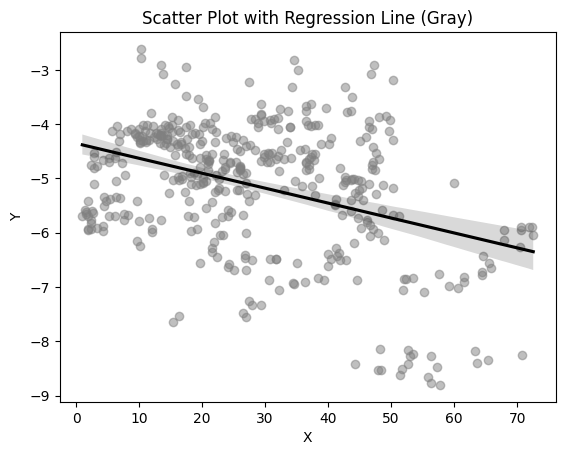

In [25]:
y = np.log(df['ihme_pe']/df['ihme_hcepc'])
x = df['regulatory']

# plt.figure(figsize=(8, 6))
sns.regplot(x = x, y = y, color='gray', scatter_kws={'color': 'gray', 'alpha': 0.5}, line_kws={'color': 'black'})

# Set plot labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot with Regression Line (Gray)')

# Show the plot
plt.show()